(720, 1280)


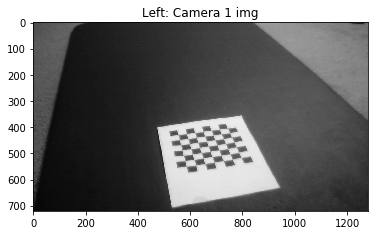

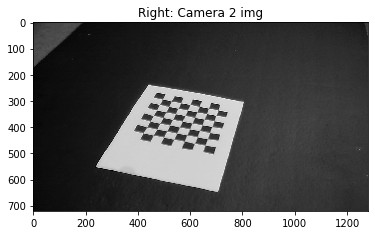

Homography matrix between camera 1 and 2, H: 
[[ 9.29968576e-01 -8.34785721e-01  3.28368011e+02]
 [ 3.21580417e-01  9.89425377e-01 -3.15245367e+02]
 [-7.93435882e-05  5.73575359e-05  1.00000000e+00]]


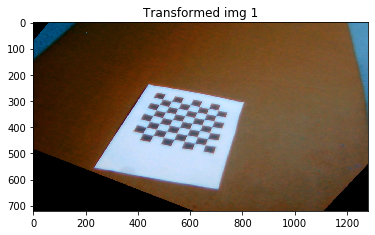

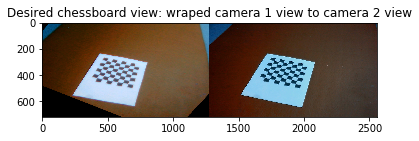

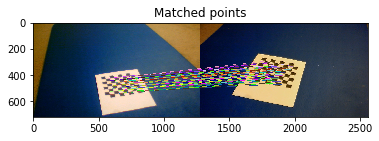

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Load chessboard img from two camera ###
## Left camera ##
imgL = cv2.imread(r'C:\Users\khan1\OneDrive\Pictures\Camera Roll\l.jpg')
## right camera ##
imgR = cv2.imread(r'C:\Users\khan1\OneDrive\Pictures\Camera Roll\r.jpg')

# plt.imshow(img1)
# plt.title("Camera 1 img")
# plt.show()

# plt.imshow(img2)
# plt.title("Camera 2 img")
# plt.show()

greyL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
greyR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
print(greyL.shape)

plt.imshow(cv2.cvtColor(greyL, cv2.COLOR_BGR2RGB))
plt.title("Left: Camera 1 img")
plt.show()

plt.imshow(cv2.cvtColor(greyR, cv2.COLOR_BGR2RGB))
plt.title("Right: Camera 2 img")
plt.show()


### find corners for each img ###
retL, cornersL = cv2.findChessboardCorners(greyL, (7,7), None) # change (9,6) value based on  checkerboard image
retR, cornersR = cv2.findChessboardCorners(greyR, (7,7), None)

# print("img 1 corners")
#print(ret1, corners1)
# print("img 2 corners")
# print(ret2, corners2)


### Estimate homography ###
H, status = cv2.findHomography(cornersL, cornersR)
print("Homography matrix between camera 1 and 2, H: ")
print(H)


# [warp-chessboard]
imgL_warp = cv2.warpPerspective(imgL, H, (imgL.shape[1], imgL.shape[0]))
# [warp-chessboard]
plt.imshow(imgL_warp)
plt.title("Transformed img 1")
plt.show()



img_draw_warp = cv2.hconcat([imgL_warp,imgR])
plt.imshow(img_draw_warp)
plt.title("Desired chessboard view: wraped camera 1 view to camera 2 view")
plt.show()


### Show which points matched
cornersL = cornersL.tolist()
cornersL = [a[0] for a in cornersL]
#print(corners1)


#original points in img 2
cornersR = cornersR.tolist()
cornersR = [a[0] for a in cornersR]
# print("original points in img 2")
# print(corners2)

reproject_points = []
# [compute-transformed-corners]
img_draw_matches = cv2.hconcat([imgL, imgR])
for i in range(len(cornersL)):
    pt1 = np.array([cornersL[i][0], cornersL[i][1], 1])
    #print(pt1)
    pt1 = pt1.reshape(3, 1)
    pt2 = np.dot(H, pt1)
    pt2 = pt2/pt2[2]
    reproject_points.append(pt2)

    end = (int(imgL.shape[1] + pt2[0]), int(pt2[1]))
    COLORS = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
    cv2.line(img_draw_matches, tuple([int(j) for j in cornersL[i]]), end, COLORS, 2)

# print(reproject_points)
plt.imshow(cv2.cvtColor(img_draw_matches, cv2.COLOR_BGR2RGB))
plt.title("Matched points")
plt.show()